##  Parte I: Análisis de la base de hogares y tipo de ocupación
 Ahora que ya están familiarizados con la Encuesta Permanente de Hogares
 (EPH) y la desocupación, vamos a complejizar un poco la construcción de las
 tasas del desempleo. Relacionaremos la información a nivel hogar

In [1]:
import os  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm     
import seaborn as sns

In [2]:
#Bases Tizi
base_ind_04_sucia = pd.read_stata(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\Compu nueva\CC408-T1-4\TP3\Individual_t104.dta")
base_ind_24_sucia = pd.read_excel(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\Compu nueva\CC408-T1-4\TP3\usu_individual_T124.xlsx")

base_hog_04_sucia = pd.read_stata(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\Compu nueva\CC408-T1-4\TP4\Hogar_t104.dta")
base_hog_24_sucia = pd.read_excel(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\Compu nueva\CC408-T1-4\TP4\usu_hogar_T124.xlsx")

In [3]:
#Bases Angie
#base_ind_04_sucia = pd.read_stata(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/Individual_t104.dta')
#base_ind_24_sucia = pd.read_excel(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/usu_individual_T124.xlsx')

#base_hog_04_sucia = pd.read_stata(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP4/Hogar_t104.dta')
#base_hog_24_sucia = pd.read_excel(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP4/usu_hogar_T124.xlsx')

### PUNTO 1
Exploren el diseño de registro de la base de hogar: a priori, ¿qué variables creen pueden ser predictivas de la desocupación y seria útil incluir para perfeccionar el ejercicio del TP3? Mencionen estas variables y justifiquen su elección.

### PUNTO 2
Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2004 y 2024 en formato .dta y .xls, respectivamente. La base de hogares se llama Hogar_t104.dta y usu_hogar_T124.xls, respectivamente. Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base. Esto es, a la base de la encuesta individual de cada año (que usaron en el TP3) unan la base de la encuesta de hogar. Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge.


In [4]:
# LIMPIO BASE INDIVIDUAL

# me quedo solo con los valores de CABA y GBA
base_ind_04_filtrada = base_ind_04_sucia.loc[base_ind_04_sucia['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
base_ind_24_filtrada = base_ind_24_sucia.loc[base_ind_24_sucia['AGLOMERADO'].isin([32, 33])]

#Para poder unir sin problema, me aseguro que als variables esten en el mismo formato

base_ind_04_filtrada.columns = base_ind_04_filtrada.columns.str.lower()
base_ind_24_filtrada.columns = base_ind_24_filtrada.columns.str.lower()

# concateno las bases
base_ind_prelimpieza = pd.concat([base_ind_24_filtrada, base_ind_04_filtrada])
print(base_ind_prelimpieza.columns.tolist())

['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'imputa', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp

In [5]:
# LIMPIO BASE HOGAR

# me quedo solo con los valores de CABA y GBA
base_hog_04_filtrada = base_hog_04_sucia.loc[base_hog_04_sucia['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
base_hog_24_filtrada = base_hog_24_sucia.loc[base_hog_24_sucia['AGLOMERADO'].isin([32, 33])]

#Para poder unir sin problema, me aseguro que als variables esten en el mismo formato
base_hog_04_filtrada.columns = base_hog_04_filtrada.columns.str.lower()
base_hog_24_filtrada.columns = base_hog_24_filtrada.columns.str.lower()

# concateno las bases
base_hog_prelimpieza = pd.concat([base_hog_24_filtrada, base_hog_04_filtrada])
print(base_hog_prelimpieza.columns.tolist())

['codusu', 'ano4', 'trimestre', 'nro_hogar', 'realizada', 'region', 'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3', 'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8', 'iv9', 'iv10', 'iv11', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1', 'ii4_1', 'ii4_2', 'ii4_3', 'ii5', 'ii5_1', 'ii6', 'ii6_1', 'ii7', 'ii7_esp', 'ii8', 'ii8_esp', 'ii9', 'v1', 'v2', 'v21', 'v22', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'ix_tot', 'ix_men10', 'ix_mayeq10', 'itf', 'decifr', 'idecifr', 'rdecifr', 'gdecifr', 'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr', 'pondih', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3', 'vii2_4', 'idimph']


In [6]:
#Mergeo las dos bases

base_prelimpieza = pd.merge(base_ind_prelimpieza, base_hog_prelimpieza, on=["codusu", "nro_hogar"], how="inner")
print(base_prelimpieza.columns.tolist())

['codusu', 'ano4_x', 'trimestre_x', 'nro_hogar', 'componente', 'h15', 'region_x', 'mas_500_x', 'aglomerado_x', 'pondera_x', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'imputa', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', '

In [7]:
# me fijo que las que aparecen en ambas bases no tengan valores diferentes 
variables_comunes = [
    'adeccfr', 'adecifr', 'aglomerado', 'ano4', 'codusu', 'deccfr', 
    'decifr', 'gdeccfr', 'gdecifr', 'ideccfr', 'idecifr', 'ipcf', 
    'itf', 'mas_500', 'nro_hogar', 'pdeccfr', 'pdecifr', 'pondera', 
    'pondih', 'rdeccfr', 'rdecifr', 'region', 'trimestre'
]

# Crear un diccionario para almacenar los resultados
diferencias_resumen = {}

# Analizar cada variable
for var in variables_comunes:
    columna_x = f"{var}_x"
    columna_y = f"{var}_y"
    
    # Comparar las columnas (asegúrate de que existen en la base)
    if columna_x in base_prelimpieza.columns and columna_y in base_prelimpieza.columns:
        # Identificar diferencias
        diferencias = base_prelimpieza[columna_x] != base_prelimpieza[columna_y]
        diferencias_count = diferencias.sum()
        
        # Almacenar resultados en el diccionario
        diferencias_resumen[var] = diferencias_count

# Convertir el resumen a un DataFrame para una mejor visualización
import pandas as pd
resumen_df = pd.DataFrame.from_dict(diferencias_resumen, orient="index", columns=["Diferencias"])
resumen_df.index.name = "Variable"
resumen_df.reset_index(inplace=True)

# Mostrar las diferencias
print(resumen_df)


      Variable  Diferencias
0      adeccfr            0
1      adecifr            0
2   aglomerado            0
3         ano4            0
4       deccfr            0
5       decifr            0
6      gdeccfr            0
7      gdecifr            0
8      ideccfr         7051
9      idecifr         7051
10        ipcf          334
11         itf            0
12     mas_500            0
13     pdeccfr         7051
14     pdecifr         7051
15     pondera            0
16      pondih         7647
17     rdeccfr            0
18     rdecifr            0
19      region            0
20   trimestre            0


In [8]:
# Mergeo las dos bases bien, fijandome que no duplique las variables 
base_prelimpieza = pd.merge(base_ind_prelimpieza, base_hog_prelimpieza, 
                          on=["codusu", "nro_hogar"], 
                          suffixes=('', '_dup'))

# Eliminar columnas duplicadas con sufijo '_dup'
for col in base_prelimpieza.columns:
    if col.endswith('_dup') and base_prelimpieza[col[:-4]].equals(base_prelimpieza[col]):
        base_prelimpieza.drop(columns=col, inplace=True)

print(base_prelimpieza.columns.tolist())

['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'imputa', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp

In [9]:
base_prelimpieza.shape

(14698, 248)

### PUNTO 3
Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones.

In [10]:
# TRATAMIENTO CATEGORICAS

# como hay datos que tienen distintas etiquetas en las dos bases que concatenamos, tenemos que  renombrar las etiquetas de una de las bases asi se pueden tener todos los datos con el mismo valor
variables_interes = base_prelimpieza[["ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "componente", "h15", "mas_500", "aglomerado", "ch03", "v5", "v6", "v7", "v8", "v11", "v12", "v13", "v17", "v19_a", "v19_b", "pp02h"]]

for i in variables_interes:
    if i == "ch04": 
        base_prelimpieza['ch04'] = base_prelimpieza['ch04'].replace({
            'Mujer': 2,
            'Varón': 1})
    elif i == "ch06":
        base_prelimpieza['ch06'] = base_prelimpieza['ch06'].replace({
            '98 y más años' : 98, 
            'Menos de 1 año' : 0})
        # cambio el formato de los valores de esta columna porque la mitad estaba en float y la mitas en int
        base_prelimpieza['ch06'] = base_prelimpieza['ch06'].astype(int)
    elif i == "ch07":
        base_prelimpieza['ch07'] = base_prelimpieza['ch07'].replace({
            'Unido': 1, 
            'Casado': 2, 
            'Separado o divorciado': 3, 
            'Viudo': 4, 
            'Soltero': 5})
    elif i == "ch08":
        base_prelimpieza['ch08'] = base_prelimpieza['ch08'].replace({
            'Obra social (incluye PAMI)': 1,  
            'Mutual/Prepaga/Servicio de emergencia': 2,  
            'Planes y seguros públicos': 3,  
            'No paga ni le descuentan': 4,  
            'Ns./Nr.': 9,  
            'Obra social y mutual/prepaga/servicio de emergencia': 12,  
            'Obra social y planes y seguros públicos': 13,  
            'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23,
            'Obra Social, mutual/prepaga/servicio de emergencia y planes y seguros públicos': 123})
    elif i == "nivel_ed":
        base_prelimpieza['nivel_ed'] = base_prelimpieza['nivel_ed'].replace({
            'Primaria Incompleta (incluye educación especial)': 1,  
            'Primaria Completa': 2,  
            'Secundaria Incompleta': 3,  
            'Secundaria Completa': 4,  
            'Superior Universitaria Incompleta': 5,  
            'Superior Universitaria Completa': 6, 
            'Sin instrucción': 7,  
            'Ns./Nr.': 9})
    elif i == "estado":
        base_prelimpieza['estado'] = base_prelimpieza['estado'].replace({
            'Ocupado': 1,  
            'Desocupado': 2,  
            'Inactivo': 3,  
            'Menor de 10 años': 4,  
            'Entrevista individual no realizada (no respuesta al cuestion': 0})
    elif i == "cat_inac":
        base_prelimpieza['cat_inac'] = base_prelimpieza['cat_inac'].replace({
            0.0 : 0,
            'Jubilado/pensionado': 1,  
            'Rentista': 2,  
            'Estudiante': 3,  
            'Ama de casa': 4,  
            'Menor de 6 años': 5,  
            'Discapacitado': 6,  
            'Otros': 7})
    elif i == "componente":
        base_prelimpieza['componente'] = base_prelimpieza['componente'].replace({
            'Servicio doméstico en hogares': 51})
        base_prelimpieza['componente'] = base_prelimpieza['componente'].astype(int)
    elif i == "h15":
        base_prelimpieza['h15'] = base_prelimpieza['h15'].replace({
            "Sí": 1,
            "No": 0,
            2 : 0})
        base_prelimpieza['h15'] = base_prelimpieza['h15'].astype(int)
    elif i == "mas_500":
        base_prelimpieza['mas_500'] = base_prelimpieza['mas_500'].replace({
            'N' : 1,
            'S' : 0})
    elif i == "aglomerado":
        base_prelimpieza['aglomerado'] = base_prelimpieza['aglomerado'].replace({
            'Ciudad de Buenos Aires' : 32,
            'Partidos del GBA' : 33})
    elif i == "ch03":
        base_prelimpieza['ch03'] = base_prelimpieza['ch03'].replace({
            'Jefe' : 1,
            'Cónyuge/Pareja' : 2,
            'Hijo/Hijastro' : 3,
            'Yerno/Nuera' : 4,
            'Nieto' : 5,
            'Madre/Padre' : 6,
            'Suegro' : 7,
            'Hermano' : 8,
            'Otros familiares' : 9,
            'No familiares' : 10})
    elif i == "v5":
        base_prelimpieza['v5'] = base_prelimpieza['v5'].replace({
            "Sí": 1,
            "No": 2,
            "Ns./Nr.":9})
    elif i == "v6":
        base_prelimpieza['v6'] = base_prelimpieza['v6'].replace({
            "Sí": 1,
            "No": 2,
            "Ns./Nr.":9})    
        base_prelimpieza['v6'] = base_prelimpieza['v6'].astype(int)
    elif i == "v7":
        base_prelimpieza['v7'] = base_prelimpieza['v7'].replace({
            "Sí": 1,
            "No": 2,
            "Ns./Nr.":9})
    elif i == "v8":
        base_prelimpieza['v8'] = base_prelimpieza['v8'].replace({
            "Sí": 1,
            "No": 2,
            "Ns./Nr.":9})
    elif i == "v11":
        base_prelimpieza['v11'] = base_prelimpieza['v11'].replace({
            "Sí": 1,
            "No": 2,
            "Ns./Nr.":9})
    elif i == "v12":
        base_prelimpieza['v12'] = base_prelimpieza['v12'].replace({
            "Sí": 1,
            "No": 2,
            "Ns./Nr.":9})
    elif i == "v13":
        base_prelimpieza['v13'] = base_prelimpieza['v13'].replace({
            "Sí": 1,
            "No": 2,
            "Ns./Nr.":9})
    elif i == "v17":
        base_prelimpieza['v17'] = base_prelimpieza['v17'].replace({
            "Sí": 1,
            "No": 2,
            "Ns./Nr.":9})    
    elif i == "v19_a":
        base_prelimpieza['v19_a'] = base_prelimpieza['v19_a'].replace({
            "Sí": 1,
            "No": 2,
            "Ns./Nr.":9})
    elif i == "v19_b":
        base_prelimpieza['v19_b'] = base_prelimpieza['v19_b'].replace({
            "Sí": 1,
            "No": 2,
            "Ns./Nr.":9})
    elif i == "pp02h":
        base_prelimpieza['pp02h'] = base_prelimpieza['pp02h'].replace({
            "Sí": 1,
            "No": 2,
            "Ns./Nr.":9})
        base_prelimpieza['pp02h'] = base_prelimpieza['pp02h'].astype(int)

    conteo = base_prelimpieza.groupby(i).size()
    print("\n", "La cantidad de datos en la variable", i, "por valor de etiqueta", "\n", conteo)


 La cantidad de datos en la variable ch04 por valor de etiqueta 
 ch04
1    6973
2    7725
dtype: int64

 La cantidad de datos en la variable ch06 por valor de etiqueta 
 ch06
-1      51
 0     131
 1     180
 2     198
 3     191
      ... 
 94      4
 95      2
 96      4
 97      1
 98      4
Length: 100, dtype: int64

 La cantidad de datos en la variable ch07 por valor de etiqueta 
 ch07
1    2118
2    3879
3     797
4     829
5    7062
9      13
dtype: int64

 La cantidad de datos en la variable ch08 por valor de etiqueta 
 ch08
1     7876
2     1176
3       49
4     5321
9       36
12     232
13       3
23       5
dtype: int64


C:\Users\tizip\AppData\Local\Temp\ipykernel_31284\795321814.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_prelimpieza['ch04'] = base_prelimpieza['ch04'].replace({
C:\Users\tizip\AppData\Local\Temp\ipykernel_31284\795321814.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_prelimpieza['ch06'] = base_prelimpieza['ch06'].replace({
C:\Users\tizip\AppData\Local\Temp\ipykernel_31284\795321814.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol


 La cantidad de datos en la variable nivel_ed por valor de etiqueta 
 nivel_ed
1    2273
2    2374
3    2790
4    2696
5    1583
6    1755
7    1227
dtype: int64

 La cantidad de datos en la variable estado por valor de etiqueta 
 estado
0      51
1    6303
2     839
3    5462
4    2043
dtype: int64

 La cantidad de datos en la variable cat_inac por valor de etiqueta 
 cat_inac
0    7193
1    1385
2      32
3    3034
4    1469
5    1165
6     100
7     320
dtype: int64

 La cantidad de datos en la variable componente por valor de etiqueta 
 componente
1     4828
2     3851
3     2602
4     1707
5      844
6      397
7      214
8      111
9       60
10      32
11      17
12      13
13       7
14       2
15       2
51      11
dtype: int64

 La cantidad de datos en la variable h15 por valor de etiqueta 
 h15
0     2094
1    12604
dtype: int64

 La cantidad de datos en la variable mas_500 por valor de etiqueta 
 mas_500
0    14698
dtype: int64

 La cantidad de datos en la variable aglomer

C:\Users\tizip\AppData\Local\Temp\ipykernel_31284\795321814.py:67: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_prelimpieza['h15'] = base_prelimpieza['h15'].replace({
C:\Users\tizip\AppData\Local\Temp\ipykernel_31284\795321814.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_prelimpieza['mas_500'] = base_prelimpieza['mas_500'].replace({
C:\Users\tizip\AppData\Local\Temp\ipykernel_31284\795321814.py:77: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain t


 La cantidad de datos en la variable v7 por valor de etiqueta 
 v7
1     1084
2    13584
9       30
dtype: int64

 La cantidad de datos en la variable v8 por valor de etiqueta 
 v8
1      429
2    14239
9       30
dtype: int64

 La cantidad de datos en la variable v11 por valor de etiqueta 
 v11
1      356
2    14312
9       30
dtype: int64

 La cantidad de datos en la variable v12 por valor de etiqueta 
 v12
1     1182
2    13486
9       30
dtype: int64

 La cantidad de datos en la variable v13 por valor de etiqueta 
 v13
1     4099
2    10566
9       33
dtype: int64

 La cantidad de datos en la variable v17 por valor de etiqueta 
 v17
1     1307
2    13361
9       30
dtype: int64

 La cantidad de datos en la variable v19_a por valor de etiqueta 
 v19_a
1       11
2    14657
9       30
dtype: int64

 La cantidad de datos en la variable v19_b por valor de etiqueta 
 v19_b
1       10
2    14658
9       30
dtype: int64

 La cantidad de datos en la variable pp02h por valor de etiqueta 
 

C:\Users\tizip\AppData\Local\Temp\ipykernel_31284\795321814.py:124: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_prelimpieza['v13'] = base_prelimpieza['v13'].replace({
C:\Users\tizip\AppData\Local\Temp\ipykernel_31284\795321814.py:129: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_prelimpieza['v17'] = base_prelimpieza['v17'].replace({
C:\Users\tizip\AppData\Local\Temp\ipykernel_31284\795321814.py:134: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

In [11]:
# VALORES NEGATIVOS EN EDAD

valores_negativos_edad = base_prelimpieza['ch06'] < 0
# Cantidad de datos negativos
cantidad_negativos_edad = valores_negativos_edad.sum()
print("Cantidad de valores negativos en variable edad:", cantidad_negativos_edad)

# Me quedo con los valores mayores o iguales a 0 de edad
base_prelimpieza = base_prelimpieza[base_prelimpieza['ch06'] >= 0]
valores_negativos_edad_post = base_prelimpieza['ch06'] < 0
cantidad_negativos_edad_post = valores_negativos_edad_post.sum()
print("Cantidad de valores negativos en variable edad post limpieza :", cantidad_negativos_edad_post)

Cantidad de valores negativos en variable edad: 51
Cantidad de valores negativos en variable edad post limpieza : 0


In [12]:
base_prelimpieza.shape

(14647, 248)

In [13]:
# VALORES NEGATIVOS EN INGRESO POR CIRCULO FAMILIAR

valores_negativos_ipcf = base_prelimpieza[base_prelimpieza['ipcf'] < 0]
# Cantidad de datos negativos
cantidad_negativos_ipcf = len(valores_negativos_ipcf)

# Mostrar resultados
print("Cantidad de valores negativos en variable ipcf:", cantidad_negativos_ipcf)

Cantidad de valores negativos en variable ipcf: 0


In [14]:
#  MISSING VALUES

missing_values = variables_interes.isnull().sum()

# Mostrar las columnas con el número de valores faltantes
print(missing_values)

# Mostrar solo las columnas con valores faltantes
missing_values_with_data = missing_values[missing_values > 0]
print("\nColumnas con valores faltantes:")
print(missing_values_with_data)

# En las variables de hogar habia la misma cantidad en todas que ponian no sabe no responde, por lo que quiero confirmar que son las mismas personas asi solo clasifico esos valores como missing values
columnas = ['v5', 'v6', 'v7', 'v8', 'v11', 'v12', 'v13', 'v17', 'v19_a', 'v19_b']
# Filtramos las filas donde las columnas seleccionadas tienen el valor "9"
mask = (base_prelimpieza[columnas] == 9).all(axis=1)
# Obtenemos solo las filas de las columnas que nos interesan
filas_ns_nr = base_prelimpieza.loc[mask, columnas]
# Mostrar las filas donde todas las columnas tienen el valor "9"
print("ni idea", filas_ns_nr)

# Como vi que si son, reemplazo los valores "9" por NaN en las columnas seleccionadas
base_prelimpieza[columnas] = base_prelimpieza[columnas].replace(9, pd.NA)
# Contar cuántos NaN hay en las columnas seleccionadas
missing_count = base_prelimpieza[columnas].isna().sum()
# Mostrar el conteo de valores faltantes (NaN)
print("la cantidad de NA es: ", missing_count)

# Eliminar filas con NaN en las columnas seleccionadas
base_limpia = base_prelimpieza.dropna(subset = columnas)

# Ver el DataFrame resultante
base_limpia.shape

ch04          0
ch06          0
ch07          0
ch08          0
nivel_ed      0
estado        0
cat_inac      0
componente    0
h15           0
mas_500       0
aglomerado    0
ch03          0
v5            0
v6            0
v7            0
v8            0
v11           0
v12           0
v13           0
v17           0
v19_a         0
v19_b         0
pp02h         0
dtype: int64

Columnas con valores faltantes:
Series([], dtype: int64)
ni idea       v5  v6  v7  v8  v11  v12  v13  v17  v19_a  v19_b
13     9   9   9   9    9    9    9    9      9      9
14     9   9   9   9    9    9    9    9      9      9
15     9   9   9   9    9    9    9    9      9      9
16     9   9   9   9    9    9    9    9      9      9
24     9   9   9   9    9    9    9    9      9      9
25     9   9   9   9    9    9    9    9      9      9
26     9   9   9   9    9    9    9    9      9      9
2170   9   9   9   9    9    9    9    9      9      9
2171   9   9   9   9    9    9    9    9      9      9
217

(14614, 248)

In [15]:
# CATEGORICAS A DUMMIES

base_limpia[["ch04", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "componente", "h15", "mas_500", "aglomerado", "ch03", "v5", "v6", "v7", "v8", "v11", "v12", "v13", "v17", "v19_a", "v19_b", "pp02h"]] = base_prelimpieza[["ch04", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "componente", "h15", "mas_500", "aglomerado", "ch03", "v5", "v6", "v7", "v8", "v11", "v12", "v13", "v17", "v19_a", "v19_b", "pp02h"]].astype('category')
base_limpia_dummies = pd.get_dummies(base_limpia, columns=["ch04", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "componente", "h15", "mas_500", "aglomerado", "ch03", "v5", "v6", "v7", "v8", "v11", "v12", "v13", "v17", "v19_a", "v19_b", "pp02h"])

print(base_limpia_dummies.columns.tolist())

C:\Users\tizip\AppData\Local\Temp\ipykernel_31284\1146379748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_limpia[["ch04", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "componente", "h15", "mas_500", "aglomerado", "ch03", "v5", "v6", "v7", "v8", "v11", "v12", "v13", "v17", "v19_a", "v19_b", "pp02h"]] = base_prelimpieza[["ch04", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "componente", "h15", "mas_500", "aglomerado", "ch03", "v5", "v6", "v7", "v8", "v11", "v12", "v13", "v17", "v19_a", "v19_b", "pp02h"]].astype('category')


['codusu', 'ano4', 'trimestre', 'nro_hogar', 'region', 'pondera', 'ch05', 'ch06', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'cat_ocup', 'imputa', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', 'pp09a', 'pp09a_esp', 'pp09b', 'pp09c', 'pp09c_esp', 'pp10a', 'pp10c', 'pp10d', 'pp10e', 'pp11a', 'pp11b

In [16]:
base_limpia_dummies.shape

(14614, 317)

In [17]:
#Aca estoy probando otra cosa con las dummies porque quiero que en la base que es
#  Variables de interés
variables_interes = ["ano4", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", 
                     "cat_inac", "componente", "h15", "mas_500", "aglomerado", 
                     "ch03", "v5", "v6", "v7", "v8", "v11", "v12", "v13", "v17", 
                     "v19_a", "v19_b", "pp02h"]

# Filtrar la base para que solo contenga las variables de interés
base_limpia_interes = base_prelimpieza[variables_interes]

# Listado de columnas que queremos convertir a dummies
columns_to_dummy = ["ch04", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", 
                    "h15", "mas_500", "aglomerado", "ch03", "v5", "v6", "v7", "v8", 
                    "v11", "v12", "v13", "v17", "v19_a", "v19_b", "pp02h"]

# Aplicar pd.get_dummies() solo a las columnas que queremos convertir a dummies
base_limpia_dummies = pd.get_dummies(base_limpia_interes, columns=columns_to_dummy)

# Convertir los valores True/False a 0/1
base_limpia_dummies = base_limpia_dummies.astype(int)

# Ver las primeras filas para confirmar que se mantuvieron las variables originales y se crearon las dummies
print(base_limpia_dummies.head())

# Ver las columnas de la base resultante
print(base_limpia_dummies.columns.tolist())


   ano4  ch06  componente  ch04_1  ch04_2  ch07_1  ch07_2  ch07_3  ch07_4  \
0  2024    85           1       0       1       0       0       0       1   
1  2024    59           2       1       0       0       1       0       0   
2  2024    57           3       0       1       0       1       0       0   
3  2024    26           1       1       0       0       0       0       0   
4  2024    88           1       0       1       0       0       0       1   

   ch07_5  ...  v13_2  v17_1  v17_2  v19_a_1  v19_a_2  v19_b_1  v19_b_2  \
0       0  ...      1      0      1        0        1        0        1   
1       0  ...      1      0      1        0        1        0        1   
2       0  ...      1      0      1        0        1        0        1   
3       1  ...      1      0      1        0        1        0        1   
4       0  ...      1      0      1        0        1        0        1   

   pp02h_0  pp02h_1  pp02h_2  
0        1        0        0  
1        1        0     

In [18]:
# Estoy luchando con esta variable porque tiene valores que no termino de entender que son 
# Sumar todos los valores de la columna 'h15_2'
suma_h15_2 = base_limpia_dummies['h15_1'].sum()

# Imprimir el resultado
print(suma_h15_2)
print(base_limpia['h15'].value_counts())

12604
h15
1    12588
0     2026
Name: count, dtype: int64


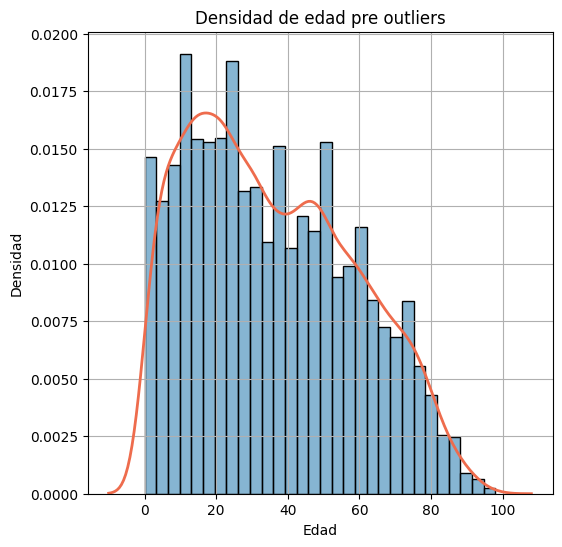

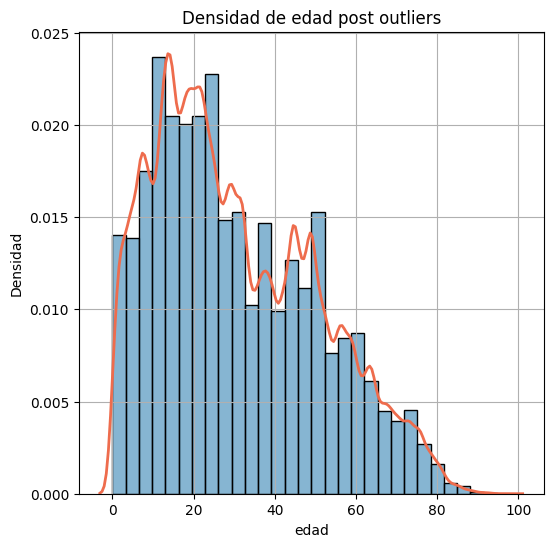

(2729041, 81)


In [19]:
# OUTLIERS DE EDAD

### DENSIDAD DE EDAD --> VER OUTLIERS
plt.figure(figsize=(6, 6))
sns.histplot(base_limpia_dummies['ch06'], bins = 30, color = '#3685B5', kde = False, stat = "density", alpha = 0.6)
sns.kdeplot(base_limpia_dummies['ch06'], color = '#EE6C4D', linewidth = 2)
plt.title('Densidad de edad pre outliers')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid()
plt.show()

# OUTLIERS DE EDAD
Q1_1 = base_limpia_dummies['ch06'].quantile(0.25)
Q3_1 = base_limpia_dummies['ch06'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1
lower_edad = Q1_1 - 1.5 * IQR_1
upper_edad = Q3_1 + 1.5 * IQR_1
# Crear un DataFrame con los límites de los cuantiles
limits_edad = pd.DataFrame({'ch06': base_limpia_dummies['ch06'], 'lower_edad': lower_edad, 'upper_edad': upper_edad}).reset_index()
# Unir los límites al DataFrame original en los localidad
base_limpia_dummies = pd.merge(base_limpia_dummies, limits_edad, on = ['ch06'])
# me quedo solo con los datos uqe son mayor o igual a "lower" y menor o igual a "upper"
base_limpia_dummies = base_limpia_dummies[
    (base_limpia_dummies['ch06'] >= base_limpia_dummies['lower_edad']) & 
    (base_limpia_dummies['ch06'] <= base_limpia_dummies['upper_edad'])]

# DENSIDAD DE EDAD
plt.figure(figsize=(6, 6))
sns.histplot(base_limpia_dummies['ch06'], bins = 30, color = '#3685B5', kde = False, stat = "density", alpha = 0.6)
sns.kdeplot(base_limpia_dummies['ch06'], color = '#EE6C4D', linewidth = 2)
plt.title('Densidad de edad post outliers')
plt.xlabel('edad')
plt.ylabel('Densidad')
plt.grid()
plt.show()

print(base_limpia_dummies.shape)

In [20]:
# OUTLIERS DE IPFC

### DENSIDAD DE EDAD --> VER OUTLIERS
plt.figure(figsize=(6, 6))
sns.histplot(base_limpia_dummies['ipcf'], bins = 30, color = '#3685B5', kde = False, stat = "density", alpha = 0.6)
sns.kdeplot(base_limpia_dummies['ipcf'], color = '#EE6C4D', linewidth = 2)
plt.title('Densidad de ipcf pre outliers')
plt.xlabel('ipcf')
plt.ylabel('Densidad')
plt.grid()
plt.show()

# Calcular límites de outliers
Q1_1 = base_limpia_dummies['ipcf'].quantile(0.25)
Q3_1 = base_limpia_dummies['ipcf'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1
lower_ipcf = Q1_1 - 1.5 * IQR_1
upper_ipcf = Q3_1 + 1.5 * IQR_1

# Filtrar los datos directamente en base a los límites
base_limpia_dummies = base_limpia_dummies[
    (base_limpia_dummies['ipcf'] >= lower_ipcf) & 
    (base_limpia_dummies['ipcf'] <= upper_ipcf)
]

# Visualización de la densidad después de eliminar outliers
plt.figure(figsize=(6, 6))
sns.histplot(base_limpia_dummies['ipcf'], bins=30, color='#3685B5', kde=False, stat="density", alpha=0.6)
sns.kdeplot(base_limpia_dummies['ipcf'], color='#EE6C4D', linewidth=2)
plt.title('Densidad de ipcf post outliers')
plt.xlabel('ipcf')
plt.ylabel('Densidad')
plt.grid()
plt.show()

print(base_limpia_dummies.shape)

KeyError: 'ipcf'

<Figure size 600x600 with 0 Axes>

### PUNTO 4
Construya variables (mínimo 3) que no estén en la base pero que sean relevantes para predecir individuos desocupados (por ejemplo, la proporción de personas que trabajan en el hogar).

In [ ]:
# PROPORCION DE PERSONAS QUE TRABAJAN EN UN HOGAR

# Tomo los datos de hogares con trabajadores ocupadas (estado_1)
base_limpia_dummies['trabajadores_hogar'] = base_limpia_dummies['estado_1']

# Calcular la proporción de trabajadores en el hogar
base_limpia_dummies['proporcion_trabajadores'] = base_limpia_dummies['trabajadores_hogar'] / base_limpia_dummies['ix_tot']
base_limpia_dummies[['proporcion_trabajadores']]

In [ ]:
# PROPORCION DE INGRESOS POR AYUDAS EXTERNAS

# tomo los datos de hogares que reciben ayudas externas y sumo la cantidad de ayudas que reciben
base_limpia_dummies["total_ayudas"] = base_limpia_dummies[["v5_1", "v6_1", "v7_1", "v12_1"]].sum(axis=1)

# Calcular la proporción de ayudas en el hogar
base_limpia_dummies["ingreso_externo"] = base_limpia_dummies['total_ayudas'] / base_limpia_dummies['ix_tot']
base_limpia_dummies[['ingreso_externo']]

In [ ]:
# PROPORCION DE VENTA DE OBJETOS MATERIALES Y GASTO DE AHORROS EN EL HOGAR

base_limpia_dummies["venta_pertenencias"] = base_limpia_dummies[["v13_1", "v17_1"]].sum(axis = 1)

# Calcular la proporción de ayudas en el hogar
base_limpia_dummies["ingreso_ventas"] = base_limpia_dummies['venta_pertenencias'] / base_limpia_dummies['ix_tot']
base_limpia_dummies[['ingreso_ventas']]

In [ ]:
# TRABAJO INFANTIL EN EL HOGAR

base_limpia_dummies["total_infante"] = base_limpia_dummies[["v19_a_1", "v19_b_1"]].sum(axis = 1)

# Calcular la proporción de ayudas en el hogar
base_limpia_dummies["ingreso_infante"] = base_limpia_dummies['total_infante'] / base_limpia_dummies['ix_tot']
base_limpia_dummies[['ingreso_infante']]

#veo si hay observaciones con trabajo infantil: mostrar valores distintos de 0
valores_no_cero = base_limpia_dummies[base_limpia_dummies["ingreso_infante"] != 0]
print(valores_no_cero)

### PUNTO 5
Presenten estadísticas descriptivas de tres variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir la desocupación. Comenten las estadísticas obtenidas.

In [ ]:
#No terminode entender que representaria esos numeros de proporcion 

# Reemplazar las etiquetas 'sí' y 'no' en la variable 'v5'
base_limpia['v5'] = base_limpia['v5']

# Crear el gráfico de barras con una paleta personalizada de verdes más oscuros
plt.figure(figsize=(10, 6))
sns.countplot(data=base_limpia, x='ano4', hue='v5',  palette=["#2F6D47", "#4C9F70"])

# Etiquetas y título
plt.title('Proporción de subsidio según ano4')
plt.xlabel('Año 4')
plt.ylabel('Proporción')
plt.legend(title='V5: Subsidio', loc='upper right', labels=['Sí', 'No'])

# Mostrar el gráfico
plt.show()

In [ ]:
# V6 (si en los últimos 3 meses vivieron con mercaderia, ropa, alimentos del gobierno, iglesias, etc)
# Reemplazar las etiquetas 'sí' y 'no' en la variable 'v6'
base_limpia['v6'] = base_limpia['v6']

# Crear el gráfico de barras con tonalidades de verde
plt.figure(figsize=(10, 6))
sns.countplot(data=base_limpia, x='ano4', hue='v6', palette=["#2F6D47", "#4C9F70"])



# Etiquetas y título
plt.title('Proporción de subsidio o ayuda (mercadería, ropa, alimentos, etc.) ')
plt.xlabel('Año 4')
plt.ylabel('Proporción')
plt.legend(title='V6: Ayuda Social', loc='upper right', labels=['Sí', 'No'])

# Mostrar el gráfico
plt.show()

In [ ]:
# V7 (si en los últimos 3 meses vivieron con mercaderia, ropa, alimentos de personas externas al hogar)


In [ ]:
# V13 (si en los ultimos 3 meses vivieron gastando lo que tenian ahorrado)

# Reemplazar las etiquetas 'sí' y 'no' en la variable 'v13'
base_limpia['v13'] = base_limpia['v13']

# Crear el gráfico de barras con tonalidades de verde
plt.figure(figsize=(10, 6))
sns.countplot(data=base_limpia, x='ano4', hue='v13', palette=["#2F6D47", "#4C9F70"])

# Etiquetas y título
plt.title('Proporción de gasto con ahorros')
plt.xlabel('Año 4')
plt.ylabel('Proporción')
plt.legend(title='V13: Gasto con Ahorros', loc='upper right', labels=['Sí', 'No'])

# Mostrar el gráfico
plt.show()


In [ ]:
# Proporción de respuestas 'sí' y 'no' para v5
proporcion_v5 = base_limpia['v5'].value_counts(normalize=True)

# Proporción de respuestas 'sí' y 'no' para v6
proporcion_v6 = base_limpia['v6'].value_counts(normalize=True)

# Proporción de respuestas 'sí' y 'no' para v13
proporcion_v13 = base_limpia['v13'].value_counts(normalize=True)

# Mostrar proporciones
print("Proporción de v5 (vivieron de subsidios o ayuda social):")
print(proporcion_v5)
print("\nProporción de v6 (vivieron con mercadería, ropa, alimentos del gobierno):")
print(proporcion_v6)
print("\nProporción de v13 (vivieron gastando lo que tenían ahorrado):")
print(proporcion_v13)


## Parte II: Clasificación y regularización
El objetivo de esta parte del trabajo es nuevamente intentar predecir si una persona está desocupada o no. Esta vez utilizando distintas variables de características individuales y del hogar del encuestado. A su vez, incluiremos ejercicios de regularización y de validación cruzada.

In [ ]:
# Base con datos que sí respondieron a la condición de actividad
respondieron = base_limpia_dummies[base_limpia_dummies['estado_0'] == 0]
respondieron_cant = respondieron.shape[0]

print("La cantidad de personas que respondieron a la pregunta de condición de actividad son:", respondieron_cant)

# Base con datos que no respondieron a la condición de actividad
no_respondieron = base_limpia_dummies[base_limpia_dummies['estado_0'] == 1]
no_respondieron_cant = no_respondieron.shape[0]

print("La cantidad de personas que no respondieron a la pregunta de condición de actividad son:", no_respondieron_cant)


### PUNTO 1
Para cada año, partan la base respondieron en una base de prueba y una de entrenamiento (X_train, y_train, X_test, y_test) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).


In [ ]:
from sklearn.model_selection import train_test_split
def preparar_datos(base, ano):
    """
    Prepara los conjuntos de entrenamiento y prueba para un año específico.
    
    Args:
        base: DataFrame original.
        ano: Año para filtrar los datos.

    Returns:
        X_train, y_train, X_test, y_test: Conjuntos de datos preparados.
    """
    # Filtrar los datos por año
    datos_ano = base[base['ano4'] == ano]
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    train, test = train_test_split(datos_ano, test_size=0.3, random_state=101)

    # Separar características y variable objetivo para entrenamiento
    X_train = train.copy()  # Mantener todas las columnas en X_train
    y_train = train['estado_2']  # Variable dependiente: estado_2

    # Agregar columna de intercepto
    X_train = X_train.assign(intercept=1)

    # Separar características y variable objetivo para prueba
    X_test = test.copy()  # Mantener todas las columnas en X_test
    y_test = test['estado_2']  # Variable dependiente: estado_2

    # Agregar columna de intercepto
    X_test = X_test.assign(intercept=1)

    return X_train, y_train, X_test, y_test

# Ejemplo de uso con los años disponibles
X_train_2004, y_train_2004, X_test_2004, y_test_2004 = preparar_datos(respondieron, 2004)
X_train_2024, y_train_2024, X_test_2024, y_test_2024 = preparar_datos(respondieron, 2024)

# Imprimir el tamaño de las particiones para un año
print(f"Tamaño de X_train para 2004: {X_train_2004.shape}")
print(f"Tamaño de y_train para 2004: {y_train_2004.shape}")
print(f"Tamaño de X_test para 2024: {X_test_2024.shape}")
print(f"Tamaño de y_test para 2024: {y_test_2024.shape}")


### PUNTO 2
Expliquen brevemente cómo elegirían λ por validación cruzada (en Python es alpha). Detallen por qué no usarían el conjunto de prueba(test) para su elección.

### PUNTO 3
En validación cruzada, ¿cuáles son las implicancias de usar un k muy pequeño o uno muy grande? Cuando k = n (con n el número de muestras), ¿cuántas veces se estima el modelo?

### PUNTO 4
Para regresión logística, implementen la penalidad, L1 como la de LASSO y L2 comola de Ridge con (como en la Tutorial 10), usando λ = 1 la opción penalty y reporten la matriz de confusión, la curva ROC, los valores de AUC y de Accuracy para cada año (En la clase magistral 9, vimos el método de regularización en regresión lineal donde la variable dependiente es numérica. En este caso, nuestra variable dependiente es binaria (ocupado, desocupado), por lo que usamos la regresión logística y aprovechamos la opción de penalidad para aplicar los métodos de regularización vistos en clase.) ¿Cómo cambiaron los resultados con respecto al TP3? ¿La performance de regresión logística con regularización es mejor o peor?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

def entrenar_evaluar_logistica(X_train, y_train, X_test, y_test, penalty):
    """
    Entrena un modelo de regresión logística con penalización L1 o L2 y evalúa su desempeño.
    
    Args:
        X_train: Matriz de características para entrenamiento.
        y_train: Vector de etiquetas para entrenamiento.
        X_test: Matriz de características para prueba.
        y_test: Vector de etiquetas para prueba.
        penalty: Tipo de penalización ('l1' o 'l2').

    Returns:
        result: Diccionario con métricas de evaluación (matriz de confusión, AUC, Accuracy).
    """
    # Entrenar el modelo
    modelo = LogisticRegression(penalty=penalty, C=1, solver='saga', max_iter=1000)
    modelo.fit(X_train, y_train)
    
    # Predicciones
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]
    
    # Calcular métricas
    matriz_confusion = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Graficar la curva ROC
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"Curva ROC - Penalización {penalty.upper()}")
    plt.legend()
    plt.show()
    
    return {
        'Matriz de Confusión': matriz_confusion,
        'AUC': auc_score,
        'Accuracy': accuracy
    }

# Evaluar para 2004 y 2024 con penalización L1 y L2
resultados_2004_L1 = entrenar_evaluar_logistica(X_train_2004, y_train_2004, X_test_2004, y_test_2004, penalty='l1')
resultados_2004_L2 = entrenar_evaluar_logistica(X_train_2004, y_train_2004, X_test_2004, y_test_2004, penalty='l2')
resultados_2024_L1 = entrenar_evaluar_logistica(X_train_2024, y_train_2024, X_test_2024, y_test_2024, penalty='l1')
resultados_2024_L2 = entrenar_evaluar_logistica(X_train_2024, y_train_2024, X_test_2024, y_test_2024, penalty='l2')

# Imprimir resultados
print("Resultados para 2004 con penalización L1:", resultados_2004_L1)
print("Resultados para 2004 con penalización L2:", resultados_2004_L2)
print("Resultados para 2024 con penalización L1:", resultados_2024_L1)
print("Resultados para 2024 con penalización L2:", resultados_2024_L2)

### PUNTO 5
Realicen un barrido en = 10n con n ∈ {−5, −4, −3 ..., +4, +5} y utilicen 10-fold CV para elegir el óptimo en regresión logística con Ridge y con λ LASSO. ¿Qué seleccionó en cada caso? Usando la librería de seaborn, generen box plot mostrando la distribución del error de predicción para cada . Cada box debe corresponder a un valor de y contener como λ observaciones el error medio de validación (MSE) para cada partición. Además, para la regularización LASSO, generen un line plot del promedio de la proporción de variables ignoradas por el modelo en función de (como vieron en el tutorial 10), es decir la proporción de λ variables para las cuales el coeficiente asociado es cero (Hint: a mayor penalidad, esperamos que más coeficientes sean 0, por lo tanto, esta figura debe tener una forma de “S”)

### PUNTO 6
En el caso del valor óptimo de para LASSO encontrado en el inciso λ anterior, ¿qué variables fueron descartadas? ¿Son las que hubieran esperado? ¿Tiene relación con lo que respondieron en el inciso 1 de la Parte I?

### PUNTO 7
Elijan alguno de los modelos de regresión logística donde hayan probado distintos parámetros de regularización y comenten: Compare los resultados de 2004 versus 2024, ¿qué método de regularización funcionó mejor: Ridge o LASSO? ¿LASSO hizo una selección distinta de predictores en 2004 versus 2024? Comenten mencionando el error cuadrático medio (MSE)